<a href="https://colab.research.google.com/github/tsato-code/colab_notebooks/blob/main/time_series_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tslearn

In [2]:
!git clone https://github.com/masatakashiwagi/analysis-tslearn.git

fatal: destination path 'analysis-tslearn' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import glob
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [4]:
def read_file_to_dataframe(filenames):
    # ファイルデータを読み込み、データフレームを返す
    dfs = []
    for filename in filenames:
        original_df = pd.read_csv(filename, index_col=None, header=0)
        dfs.append(original_df)
    return dfs

def time_series_data_to_array(dataframes, target_col=''):
    # データフレームを読み込み、それらを時系列の配列にする
    tsdata = []
    for i, df in enumerate(dataframes):
        tsdata.append(df[target_col].values.tolist()[:])
    
    # それぞれの時系列データの最大の長さを確認
    len_max = 0
    for ts in tsdata:
        if len(ts) > len_max:
            len_max = len(ts)
    
    # 時系列データの長さを揃えるために、最後のデータを付け加える
    for i, ts in enumerate(tsdata):
        len_add = len_max - len(ts)
        tsdata[i] = ts + [ts[-1]] * len_add

    tsdata = np.array(tsdata)
    return tsdata

def transform_vector(time_series_array):
    # ベクトルに変換
    stack_list = []
    for j in range(len(time_series_array)):
        data = np.array(time_series_array[j])
        data = data.reshape((1, len(data))).T
        stack_list.append(data)

    # 一次元配列にする
    stack_data = np.stack(stack_list, axis=0)
    return stack_data

filenames = sorted(glob.glob('/content/analysis-tslearn/sample_data/sample_data*.csv'))
df = read_file_to_dataframe(filenames=filenames)
tsdata = time_series_data_to_array(dataframes=df, target_col='data')
stack_data = transform_vector(time_series_array=tsdata)

In [5]:
for _df in df:
    print(_df.shape)
    display(_df.head(1))

(70, 2)


,time,data
0,2018/01/01 13:00:00,0.99364


(71, 2)


,time,data
0,2018/01/01 14:00:00,-0.060775


(70, 2)


,time,data
0,2018/01/01 15:00:00,0.61165


(70, 2)


,time,data
0,2018/01/01 16:00:00,0.6445


(70, 2)


,time,data
0,2018/01/01 17:00:00,0.8053


(70, 2)


,time,data
0,2018/01/01 18:00:00,1.2042


(70, 2)


,time,data
0,2018/01/01 19:00:00,1.1821


(70, 2)


,time,data
0,2018/01/01 20:00:00,1.3424


(70, 2)


,time,data
0,2018/01/01 21:00:00,0.93054


(67, 2)


,time,data
0,2018/01/01 22:00:00,-0.33813


In [8]:
print(stack_data.shape)
print(stack_data[0, :, :].shape)
print(stack_data[:, 0, :].shape)
print(stack_data[:, :, 0].shape)

(10, 71, 1)
(71, 1)
(10, 1)
(10, 71)


In [12]:
print(tsdata.shape)
print(tsdata[0, :].shape)
print(tsdata[0, :])

(10, 71)
(71,)
[ 0.99364   2.2738    2.9139    2.2738    1.6337    0.14021  -0.71322
 -1.1399   -0.92658  -0.49987  -0.92658  -1.5667   -1.78     -1.9934
 -2.2067   -1.78     -1.3533   -0.71322  -0.49987  -0.28651   0.35356
  0.35356   0.78028   0.78028   0.78028   0.56692   0.56692   0.35356
  0.56692   0.56692   0.56692   0.35356   0.35356   0.14021   0.14021
  0.35356   0.14021   0.35356   0.56692   0.78028   0.78028   1.207
  1.4204    1.4204    0.35356  -0.28651  -0.71322  -0.92658  -0.92658
 -0.71322  -0.71322  -1.1399   -1.5667   -1.3533   -1.1399   -0.49987
  0.14021   0.14021   0.14021   0.14021   0.14021   0.35356   0.35356
  0.14021  -0.073151 -0.073151 -0.073151  0.14021   0.14021  -0.073151
 -0.073151]


Init 1
0.015 --> 0.016 --> 
Init 2
Resumed because of empty cluster
Init 2
0.010 --> 0.012 --> 
Init 3
0.019 --> Resumed because of empty cluster
Init 3
0.018 --> 0.018 --> 0.018 --> 
Init 4
0.013 --> 0.013 --> 0.022 --> 
Init 5
Resumed because of empty cluster
Init 5
0.006 --> 0.010 --> 
Init 6
Resumed because of empty cluster
Init 6
0.006 --> 0.010 --> 


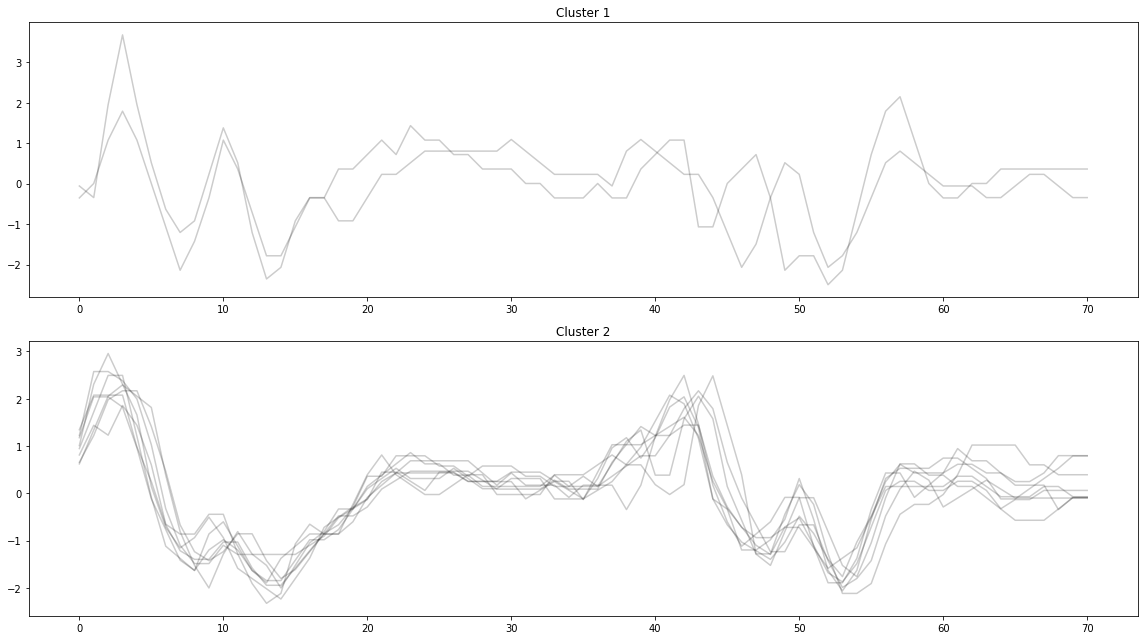

In [17]:
seed = 0
np.random.seed(seed)
# 相互相関を計算するために、正規化する必要があります。
# TimeSeriesScalerMeanVarianceがデータを正規化してくれるクラスになります。
stack_data = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0).fit_transform(stack_data)

# KShapeクラスのインスタンス化
ks = KShape(n_clusters=2, n_init=10, verbose=True, random_state=seed)
y_pred = ks.fit_predict(stack_data)

# クラスタリングして可視化
plt.figure(figsize=(16,9))
for yi in range(2):
    plt.subplot(2, 1, 1 + yi)
    for xx in stack_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    #plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

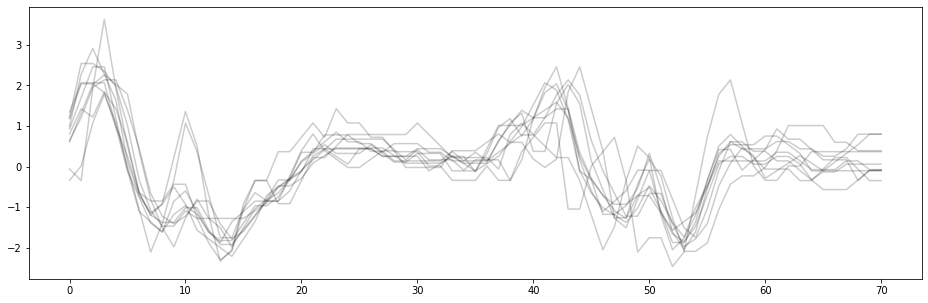

In [16]:
# 元データの可視化
plt.figure(figsize=(16,5))
for x in tsdata:
    plt.plot(x, "k-", alpha=.2)
plt.show()

Init 1
0.023 --> 0.024 --> 
Init 2
0.022 --> 0.023 --> 
Init 3
0.022 --> 0.022 --> 0.023 --> 
Init 4
0.022 --> 0.022 --> 0.023 --> 
Init 5
0.022 --> 0.023 --> 
Init 6
0.023 --> 0.023 --> 0.033 --> 
Init 7
0.022 --> 0.022 --> 0.023 --> 
Init 8
0.023 --> 0.024 --> 
Init 9
0.023 --> 0.023 --> 
Init 10
0.027 --> 0.023 --> 0.024 --> 
Init 1
0.015 --> 0.016 --> 
Init 2
Resumed because of empty cluster
Init 2
0.010 --> 0.012 --> 
Init 3
0.019 --> Resumed because of empty cluster
Init 3
0.018 --> 0.018 --> 0.018 --> 
Init 4
0.013 --> 0.013 --> 0.022 --> 
Init 5
Resumed because of empty cluster
Init 5
0.006 --> 0.010 --> 
Init 6
Resumed because of empty cluster
Init 6
0.006 --> 0.010 --> 
Init 1
0.009 --> Resumed because of empty cluster
Init 1
0.008 --> 0.009 --> 
Init 2
0.015 --> Resumed because of empty cluster
Init 2
0.010 --> 0.009 --> 0.016 --> 
Init 3
Resumed because of empty cluster
Init 3
Resumed because of empty cluster
Init 3
0.004 --> 0.007 --> 
Init 4
Resumed because of empty clust

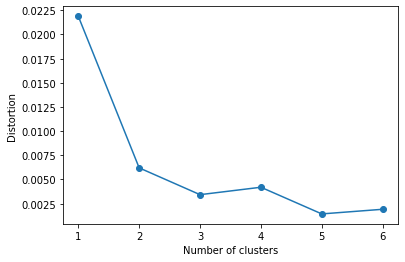

In [6]:
distortions = []

#1~10クラスタまで計算
for i in range(1,11):
    ks = KShape(n_clusters=i, n_init=10, verbose=True, random_state=seed)

    #クラスタリングの計算を実行
    ks.fit(stack_data)
    #ks.fitするとks.inertia_が得られる
    #inertia_でSSEを取得できる
    distortions.append(ks.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()